In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None #So that Dataframe outputs dont hide any columns
pd.options.display.max_rows = 1000

In [2]:
#Loading the Datasets
season_stats = pd.read_excel('FPL_2020-2021_agg_stats.xlsx')
weekly_stats = pd.read_excel('FPL_2020-2021_weekly_stats.xlsx')

In [3]:
season_stats.head()

,team,id,first_name,second_name,web_name,element_type,minutes,goals_scored,assists,clean_sheets,goals_conceded,penalties_missed,penalties_saved,own_goals,yellow_cards,red_cards,now_cost,influence,creativity,threat,influence_rank,influence_rank_type,creativity_rank,threat_rank,ict_index,ict_index_rank,status,total_points,points_per_game,bonus,bps,dreamteam_count,selected_by_percent
0,1,1,Mesut,Özil,Özil,3,0,0,0,0,0,0,0,0,0,0,6.7,0.0,0.0,0.0,713,295,713,713,0.0,713,u,0,0.0,0,0,0,0.5
1,1,2,Sokratis,Papastathopoulos,Sokratis,2,0,0,0,0,0,0,0,0,0,0,4.8,0.0,0.0,0.0,682,240,674,667,0.0,685,u,0,0.0,0,0,0,0.1
2,1,3,David,Luiz Moreira Marinho,David Luiz,2,1396,1,0,3,20,0,0,0,1,1,5.4,250.6,46.7,144.0,264,101,346,244,43.9,310,a,41,2.0,0,230,0,0.8
3,1,4,Pierre-Emerick,Aubameyang,Aubameyang,3,2330,10,3,10,26,0,0,1,2,0,11.3,493.8,361.5,823.0,136,49,101,34,167.4,52,a,131,4.5,11,358,3,7.2
4,1,5,Cédric,Soares,Cédric,2,744,0,1,2,11,0,0,0,1,0,4.6,110.8,114.8,66.0,366,140,249,330,29.2,356,a,28,2.8,3,125,0,0.3


In [4]:
weekly_stats.head()

,element,round,opponent_team,was_home,team_h_score,team_a_score,minutes,total_points,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,value,selected
0,1,1,8,False,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,7.0,76656
1,1,2,19,True,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,6.9,68335
2,1,3,11,False,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,6.9,59793
3,1,4,15,True,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,6.8,56403
4,1,5,12,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,6.8,53689


In [5]:
#creating a copy of original dfs
season_stats_modified = season_stats.copy()
weekly_stats_modified = weekly_stats.copy()

In [6]:
#Mapping existing columns to new values
team_names = {1:'Arsenal',2:'Aston Villa',3:'Brighton',4:'Burnley',5:'Chelsea',6:'Crystal Palace',7:'Everton',8:'Fulham',9:'Leeds',10:'Leicester',11:'Liverpool',12:'Man City',13 :'Man Utd',14:'Newcastle',15:'Sheffield Utd',16:'Southampton',17:'Spurs',18:'West Brom',19:'West Ham',20:'Wolves'}
element_type_names = {1:'GK',2:'DEF',3:'MID',4:'FWD'}

In [7]:
#mapping values to existing dfs
season_stats_modified['team'] = season_stats_modified['team'].map(team_names)
season_stats_modified['element_type'] = season_stats_modified['element_type'].map(element_type_names)
weekly_stats_modified['opponent_team'] = weekly_stats_modified['opponent_team'].map(team_names)

In [8]:
# Now creating DF for exclusive stats
season_stats_agg = season_stats_modified.groupby('team').agg({'assists':sum,'own_goals':sum,'yellow_cards':sum,'red_cards':sum})
season_stats_agg

,assists,own_goals,yellow_cards,red_cards
team,,,,
Arsenal,50,4,47,5
Aston Villa,51,1,63,4
Brighton,31,2,44,6
Burnley,25,1,48,0
Chelsea,53,1,49,3
Crystal Palace,39,0,54,2
Everton,45,1,59,2
Fulham,23,1,66,3
Leeds,59,2,61,0


In [9]:
season_stats_agg = season_stats_agg.reset_index() # converting groupby object to dataframe

In [10]:
#To find number of clean_sheets
weekly_stats_modified.rename(columns={'element':'player_id'},inplace=True)
weekly_stats_modified_merged= pd.merge(weekly_stats_modified,season_stats_modified[['id','team']],left_on='player_id',right_on='id')

In [11]:
#getting number of clean sheets for both home and away
team_names_loop = ['Arsenal', 'Aston Villa', 'Brighton', 'Burnley', 'Chelsea','Crystal Palace', 'Everton', 'Fulham','Leicester','Leeds','Liverpool', 'Man City', 'Man Utd', 'Newcastle', 'Sheffield Utd','Southampton', 'Spurs', 'West Brom', 'West Ham', 'Wolves']
away_clean_sheets=list(np.zeros(20))
home_clean_sheets=list(np.zeros(20))
for i in range(len(team_names_loop)):
    df = weekly_stats_modified_merged[weekly_stats_modified_merged['team']==team_names_loop[i]]
    df = df[df['player_id']==list(df['player_id'].unique())[3]].reset_index()
    for j in range(0,38):
        if (df['was_home'][j]==False) & (df['team_h_score'][j]==0):
            away_clean_sheets[i]=away_clean_sheets[i]+1
        elif (df['was_home'][j]==True) & (df['team_a_score'][j]==0):
            home_clean_sheets[i]=home_clean_sheets[i]+1

In [12]:
season_stats_agg['home_clean_sheets']=home_clean_sheets
season_stats_agg['away_clean_sheets']=away_clean_sheets
season_stats_agg['away_clean_sheets']=season_stats_agg['away_clean_sheets'].astype(int)
season_stats_agg['home_clean_sheets']=season_stats_agg['home_clean_sheets'].astype(int)
season_stats_agg['total_clean_sheets']=season_stats_agg['away_clean_sheets'] + season_stats_agg['home_clean_sheets']

In [13]:
season_stats_agg

,team,assists,own_goals,yellow_cards,red_cards,home_clean_sheets,away_clean_sheets,total_clean_sheets
0,Arsenal,50,4,47,5,4,8,12
1,Aston Villa,51,1,63,4,7,8,15
2,Brighton,31,2,44,6,7,5,12
3,Burnley,25,1,48,0,3,8,11
4,Chelsea,53,1,49,3,10,8,18
5,Crystal Palace,39,0,54,2,6,2,8
6,Everton,45,1,59,2,3,9,12
7,Fulham,23,1,66,3,5,4,9
8,Leeds,59,2,61,0,6,6,12
9,Leicester,57,2,61,1,6,5,11


In [14]:
#getting number of goals conceded for both home and away
team_names_loop = ['Arsenal', 'Aston Villa', 'Brighton', 'Burnley', 'Chelsea','Crystal Palace', 'Everton', 'Fulham', 'Leicester','Leeds','Liverpool', 'Man City', 'Man Utd', 'Newcastle', 'Sheffield Utd','Southampton', 'Spurs', 'West Brom', 'West Ham', 'Wolves']
away_goals_conceded=list(np.zeros(20))
home_goals_conceded=list(np.zeros(20))
for i in range(len(team_names_loop)):
    df = weekly_stats_modified_merged[weekly_stats_modified_merged['team']==team_names_loop[i]]
    df = df[df['player_id']==list(df['player_id'].unique())[3]].reset_index()
    for j in range(0,38):
        if (df['was_home'][j]==False):
            away_goals_conceded[i]=away_goals_conceded[i]+df['team_h_score'][j]
        elif (df['was_home'][j]==True):
            home_goals_conceded[i]=home_goals_conceded[i]+df['team_a_score'][j]

In [15]:
season_stats_agg['home_goals_conceded']=home_goals_conceded
season_stats_agg['away_goals_conceded']=away_goals_conceded
season_stats_agg['home_goals_conceded']=season_stats_agg['home_goals_conceded'].astype(int)
season_stats_agg['away_goals_conceded']=season_stats_agg['away_goals_conceded'].astype(int)
season_stats_agg['total_goals_conceded']=season_stats_agg['home_goals_conceded'] + season_stats_agg['away_goals_conceded']

In [16]:
season_stats_agg

,team,assists,own_goals,yellow_cards,red_cards,home_clean_sheets,away_clean_sheets,total_clean_sheets,home_goals_conceded,away_goals_conceded,total_goals_conceded
0,Arsenal,50,4,47,5,4,8,12,21,18,39
1,Aston Villa,51,1,63,4,7,8,15,27,19,46
2,Brighton,31,2,44,6,7,5,12,22,24,46
3,Burnley,25,1,48,0,3,8,11,27,28,55
4,Chelsea,53,1,49,3,10,8,18,18,18,36
5,Crystal Palace,39,0,54,2,6,2,8,32,34,66
6,Everton,45,1,59,2,3,9,12,28,20,48
7,Fulham,23,1,66,3,5,4,9,28,25,53
8,Leeds,59,2,61,0,6,6,12,21,33,54
9,Leicester,57,2,61,1,6,5,11,30,20,50


In [17]:
#getting number of goals scored for both home and away

team_names_loop = ['Arsenal', 'Aston Villa', 'Brighton', 'Burnley', 'Chelsea','Crystal Palace', 'Everton', 'Fulham','Leicester','Leeds','Liverpool', 'Man City', 'Man Utd', 'Newcastle', 'Sheffield Utd','Southampton', 'Spurs', 'West Brom', 'West Ham', 'Wolves']
away_goals_scored=list(np.zeros(20))
home_goals_scored=list(np.zeros(20))
for i in range(len(team_names_loop)):
    df = weekly_stats_modified_merged[weekly_stats_modified_merged['team']==team_names_loop[i]]
    df = df[df['player_id']==list(df['player_id'].unique())[3]].reset_index()
    for j in range(0,38):
        if (df['was_home'][j]==False):
            away_goals_scored[i]=away_goals_scored[i]+df['team_a_score'][j]
        elif (df['was_home'][j]==True):
            home_goals_scored[i]=home_goals_scored[i]+df['team_h_score'][j]

In [18]:
season_stats_agg['home_goals_scored']=home_goals_scored
season_stats_agg['away_goals_scored']=away_goals_scored
season_stats_agg['home_goals_scored']=season_stats_agg['home_goals_scored'].astype(int)
season_stats_agg['away_goals_scored']=season_stats_agg['away_goals_scored'].astype(int)
season_stats_agg['total_goals_scored']=season_stats_agg['home_goals_scored'] + season_stats_agg['away_goals_scored']

In [19]:
season_stats_agg

,team,assists,own_goals,yellow_cards,red_cards,home_clean_sheets,away_clean_sheets,total_clean_sheets,home_goals_conceded,away_goals_conceded,total_goals_conceded,home_goals_scored,away_goals_scored,total_goals_scored
0,Arsenal,50,4,47,5,4,8,12,21,18,39,24,31,55
1,Aston Villa,51,1,63,4,7,8,15,27,19,46,29,26,55
2,Brighton,31,2,44,6,7,5,12,22,24,46,22,18,40
3,Burnley,25,1,48,0,3,8,11,27,28,55,14,19,33
4,Chelsea,53,1,49,3,10,8,18,18,18,36,31,27,58
5,Crystal Palace,39,0,54,2,6,2,8,32,34,66,20,21,41
6,Everton,45,1,59,2,3,9,12,28,20,48,24,23,47
7,Fulham,23,1,66,3,5,4,9,28,25,53,9,18,27
8,Leeds,59,2,61,0,6,6,12,21,33,54,28,34,62
9,Leicester,57,2,61,1,6,5,11,30,20,50,34,34,68


In [20]:
#getting number of points claimed for both home and away
team_names_loop = ['Arsenal', 'Aston Villa', 'Brighton', 'Burnley', 'Chelsea','Crystal Palace', 'Everton', 'Fulham','Leicester','Leeds','Liverpool', 'Man City', 'Man Utd', 'Newcastle', 'Sheffield Utd','Southampton', 'Spurs', 'West Brom', 'West Ham', 'Wolves']
away_points=list(np.zeros(20))
home_points=list(np.zeros(20))
for i in range(len(team_names_loop)):
    df = weekly_stats_modified_merged[weekly_stats_modified_merged['team']==team_names_loop[i]]
    df = df[df['player_id']==list(df['player_id'].unique())[3]].reset_index()
    for j in range(0,38):
        if (df['was_home'][j]==False):
            if(df['team_h_score'][j] < df['team_a_score'][j]):
                away_points[i]=away_points[i]+3
            elif(df['team_h_score'][j] == df['team_a_score'][j]):
                away_points[i]=away_points[i]+1
            elif(df['team_h_score'][j] > df['team_a_score'][j]):
                away_points[i]=away_points[i]+0
        elif (df['was_home'][j]==True):
            if(df['team_h_score'][j] > df['team_a_score'][j]):
                home_points[i]=home_points[i]+3
            elif(df['team_h_score'][j] == df['team_a_score'][j]):
                home_points[i]=home_points[i]+1
            elif(df['team_h_score'][j] < df['team_a_score'][j]):
                home_points[i]=home_points[i]+0

In [21]:
season_stats_agg['home_points']=home_points
season_stats_agg['away_points']=away_points
season_stats_agg['home_points']=season_stats_agg['home_points'].astype(int)
season_stats_agg['away_points']=season_stats_agg['away_points'].astype(int)
season_stats_agg['total_points']=season_stats_agg['home_points'] + season_stats_agg['away_points']

In [22]:
season_stats_agg

,team,assists,own_goals,yellow_cards,red_cards,home_clean_sheets,away_clean_sheets,total_clean_sheets,home_goals_conceded,away_goals_conceded,total_goals_conceded,home_goals_scored,away_goals_scored,total_goals_scored,home_points,away_points,total_points
0,Arsenal,50,4,47,5,4,8,12,21,18,39,24,31,55,28,33,61
1,Aston Villa,51,1,63,4,7,8,15,27,19,46,29,26,55,25,30,55
2,Brighton,31,2,44,6,7,5,12,22,24,46,22,18,40,21,20,41
3,Burnley,25,1,48,0,3,8,11,27,28,55,14,19,33,18,21,39
4,Chelsea,53,1,49,3,10,8,18,18,18,36,31,27,58,33,34,67
5,Crystal Palace,39,0,54,2,6,2,8,32,34,66,20,21,41,23,21,44
6,Everton,45,1,59,2,3,9,12,28,20,48,24,23,47,22,37,59
7,Fulham,23,1,66,3,5,4,9,28,25,53,9,18,27,10,18,28
8,Leeds,59,2,61,0,6,6,12,21,33,54,28,34,62,29,30,59
9,Leicester,57,2,61,1,6,5,11,30,20,50,34,34,68,28,38,66


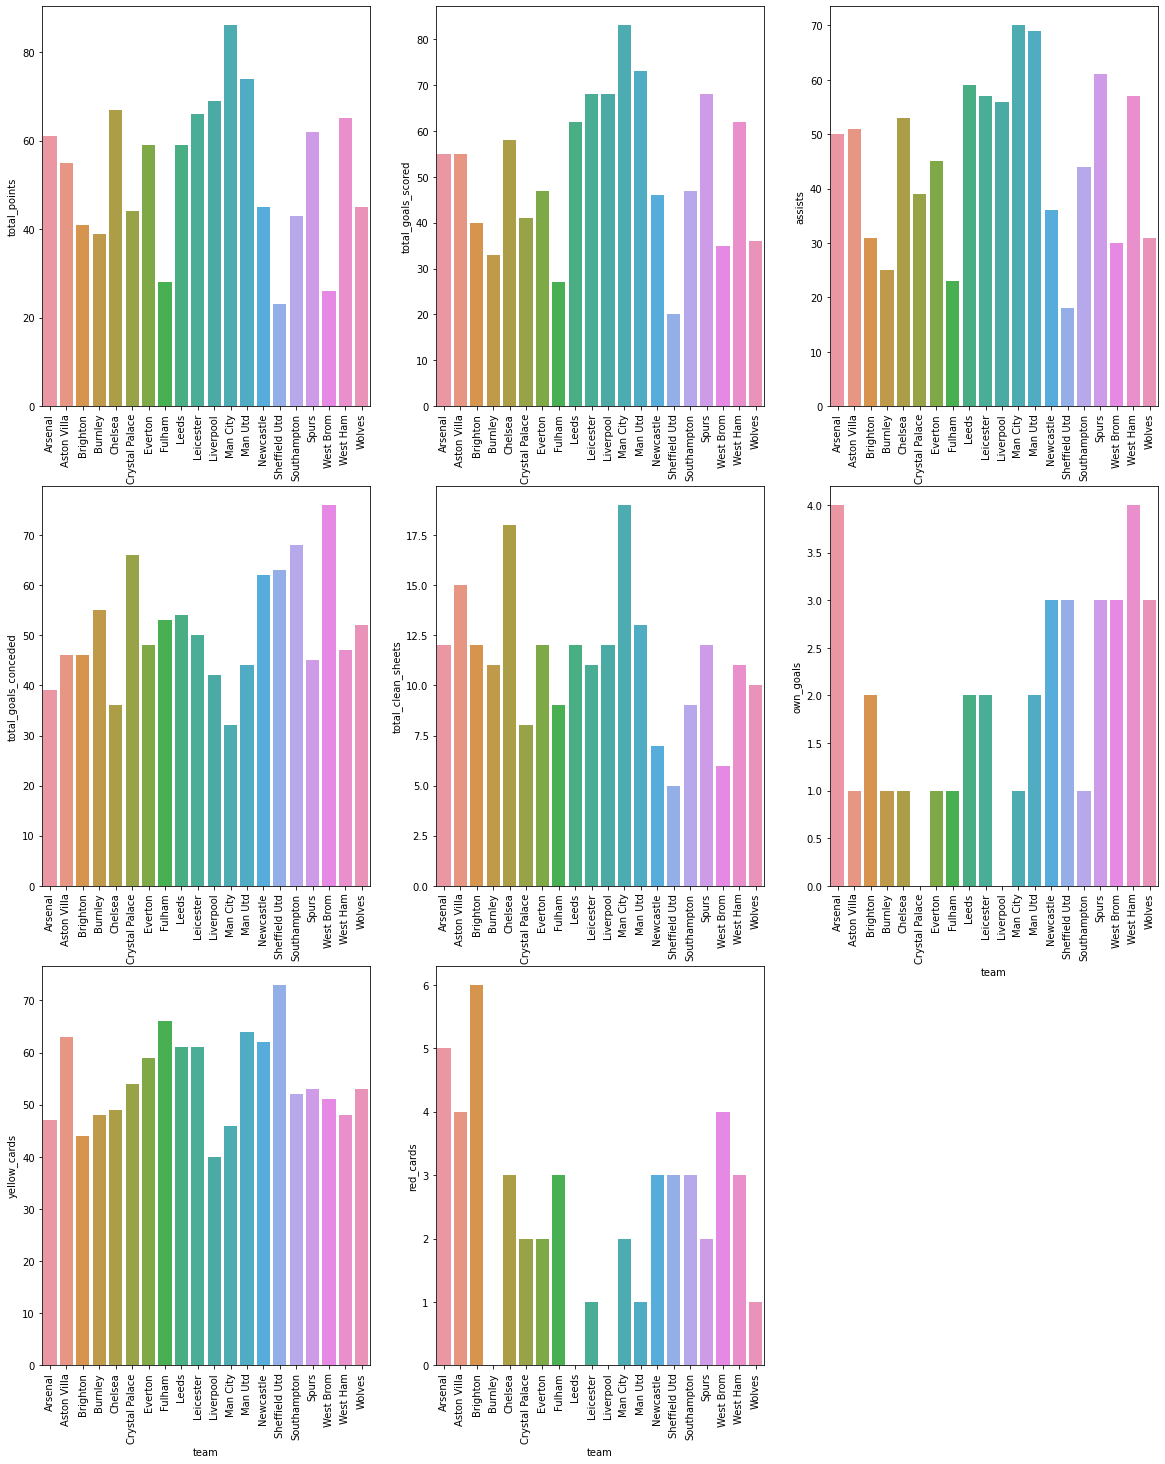

In [23]:
columns = ['total_points','total_goals_scored','assists', 'total_goals_conceded','total_clean_sheets','own_goals', 'yellow_cards', 'red_cards']
fig = plt.figure(figsize=(20,25))

for i in range(len(columns)):
    plt.subplot(3,3,i+1)
    plt.xticks(rotation=90)
    sns.barplot(x=season_stats_agg['team'],y=season_stats_agg[columns[i]])   

1. The Manchester clubs have scored the most goals,Sheffield have the least number of goals, Leeds competing with the big boys in goals scored, no wonder people enjoy watching bielsa's men play.
2. United have the most assists in the leads, just above City.
3. Arsenal and West Ham have scored most in the back of their own net.
4. Liverpool have least number of bookings this season.
5. Brighton have the most sending offs this season.
6. Chelsea and Man City have most clean sheets

# Now lets Check the goal contributions based on position for each team

In [24]:
#created a dataframe with goal contributions( Goals + Assists), based on team and position
season_stats_pos_agg=season_stats_modified.groupby(['team','element_type']).agg({'goals_scored':sum,'assists':sum})
season_stats_pos_agg=season_stats_pos_agg.unstack()
season_stats_pos_agg

goals_scored            assists           
element_type            DEF FWD GK MID     DEF FWD GK MID
team                                                     
Arsenal                   5  15  0  33      12   4  0  34
Aston Villa               5  15  0  32       8  10  0  33
Brighton                  9  16  0  14       4   7  0  20
Burnley                   5  19  0   8       6   8  0  11
Chelsea                  15  16  0  25      12  14  0  27
Crystal Palace            3  14  0  22       8   8  0  23
Everton                   6  23  0  16      15  12  0  18
Fulham                    4  11  0  11       5   6  0  12
Leeds                     9  27  0  28      10  16  0  33
Leicester                13  24  0  23       6  15  0  36
Liverpool                 6   9  1  48      19   8  0  29
Man City                 11  13  0  58       9   6  1  54
Man Utd                   6  14  0  50      15  11  0  43
Newcastle                 6  18  0  20       2  10  0  24
Sheffield Utd             3  13  0   3       7   3  0   8
Southampton               4  21  0  23       7  11  0  26
Spurs                     3  24  0  39      13  14  0  34
West Brom                 6  11  0  16       9   8  1  12
West Ham                 11  13  0  36      23   5  0  29
Wolves                    7   9  0  18       6   5  0  20

In [25]:
#Top 5 teams with highest goals from defenders
season_stats_pos_agg[('goals_scored', 'DEF')].sort_values(ascending=False)[:5]

team
Chelsea      15
Leicester    13
Man City     11
West Ham     11
Brighton      9
Name: (goals_scored, DEF), dtype: int64

Chelsea's defenders have contirbuted most goals in the league

In [26]:
#Top 5 teams with highest goals from Midfielders
season_stats_pos_agg[('goals_scored', 'MID')].sort_values(ascending=False)[:5]

team
Man City     58
Man Utd      50
Liverpool    48
Spurs        39
West Ham     36
Name: (goals_scored, MID), dtype: int64

Man City have a lethal midfield , contributing to majority of their goals.

In [27]:
#top 5 teams with highest goals from Forwards
season_stats_pos_agg[('goals_scored', 'FWD')].sort_values(ascending=False)[:5]

team
Leeds          27
Leicester      24
Spurs          24
Everton        23
Southampton    21
Name: (goals_scored, FWD), dtype: int64

In [28]:
season_stats_pos_agg = season_stats_pos_agg.reset_index()

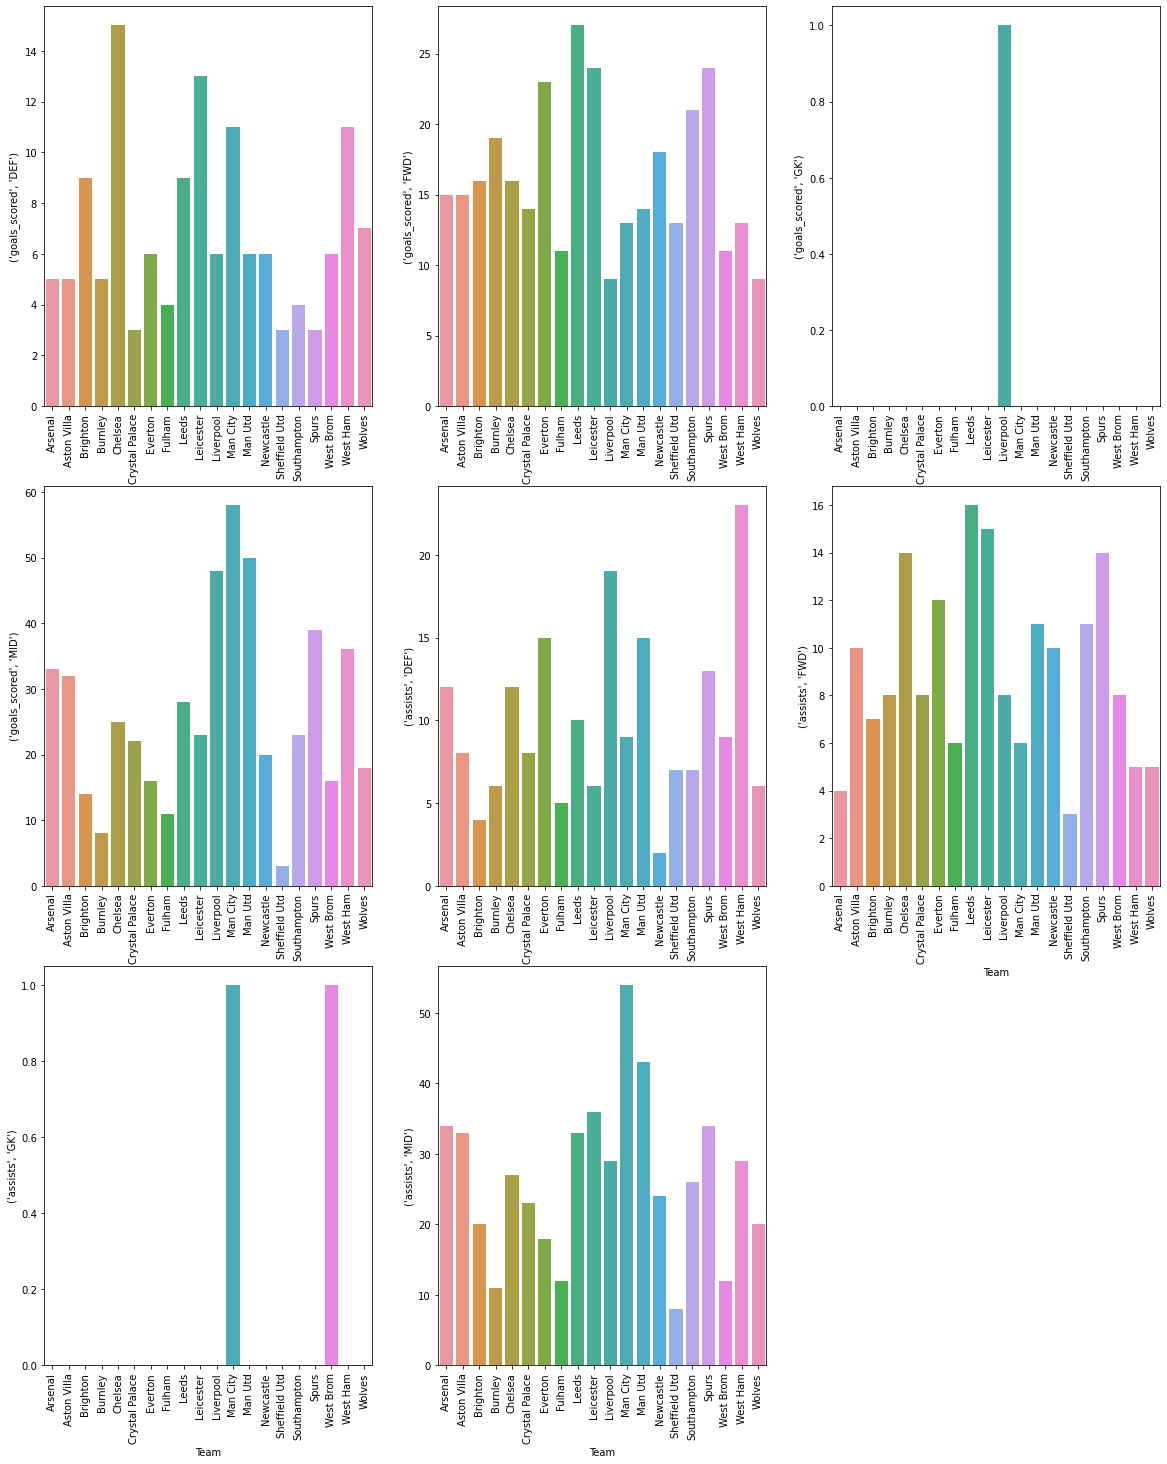

In [29]:
columns = [('goals_scored', 'DEF'),('goals_scored', 'FWD'),('goals_scored',  'GK'),('goals_scored', 'MID'),('assists', 'DEF'),('assists', 'FWD'),('assists',  'GK'),('assists', 'MID')]
fig = plt.figure(figsize=(20,25))

for i in range(len(columns)):
    plt.subplot(3,3,i+1)
    plt.xticks(rotation=90)
    sns.barplot(x=season_stats_pos_agg[('team','')],y=season_stats_pos_agg[columns[i]])
    plt.xlabel("Team")

# Individual Player Stats

In [30]:
def top_stat(stat):
    if stat=='clean_sheets':
        top = season_stats_modified[season_stats_modified['element_type']=='GK']
        top = top.sort_values(stat,ascending=False)
    else:
        top = season_stats_modified.sort_values(stat,ascending=False)
    return top[['web_name',stat]][:20]

#if needed to plot top values for any feature
def plot_top_stat(stat):
    if stat=='clean_sheets':
        top = season_stats_modified[season_stats_modified['element_type']=='GK']
        top = top.sort_values(stat,ascending=False)
        top = top[['web_name',stat]][:20]
        plt.xticks(rotation=90)
        sns.barplot(x=top['web_name'],y=top[stat])
    else:
        top = season_stats_modified.sort_values(stat,ascending=False)
        top = top[['web_name',stat]][:20]
        plt.xticks(rotation=90)
        sns.barplot(x=top['web_name'],y=top[stat])

In [31]:
#top 20 scorers this season
top_stat('goals_scored')

,web_name,goals_scored
572,Kane,23
363,Salah,22
432,Fernandes,18
574,Son,17
322,Bamford,17
218,Calvert-Lewin,16
286,Vardy,15
62,Watkins,14
391,Gündogan,13
5,Lacazette,13


In [32]:
top_stat('assists')

,web_name,assists
432,Fernandes,14
572,Kane,14
286,Vardy,14
392,De Bruyne,12
154,Werner,12
44,Grealish,12
574,Son,11
648,Cresswell,11
360,Mané,11
436,Rashford,11


In [33]:
top_stat('clean_sheets')

,web_name,clean_sheets
398,Ederson,19
165,Mendy,16
34,Martínez,15
567,Lloris,12
7,Leno,11
333,Meslier,11
125,Pope,11
279,Schmeichel,11
644,Fabianski,10
99,Sánchez,10


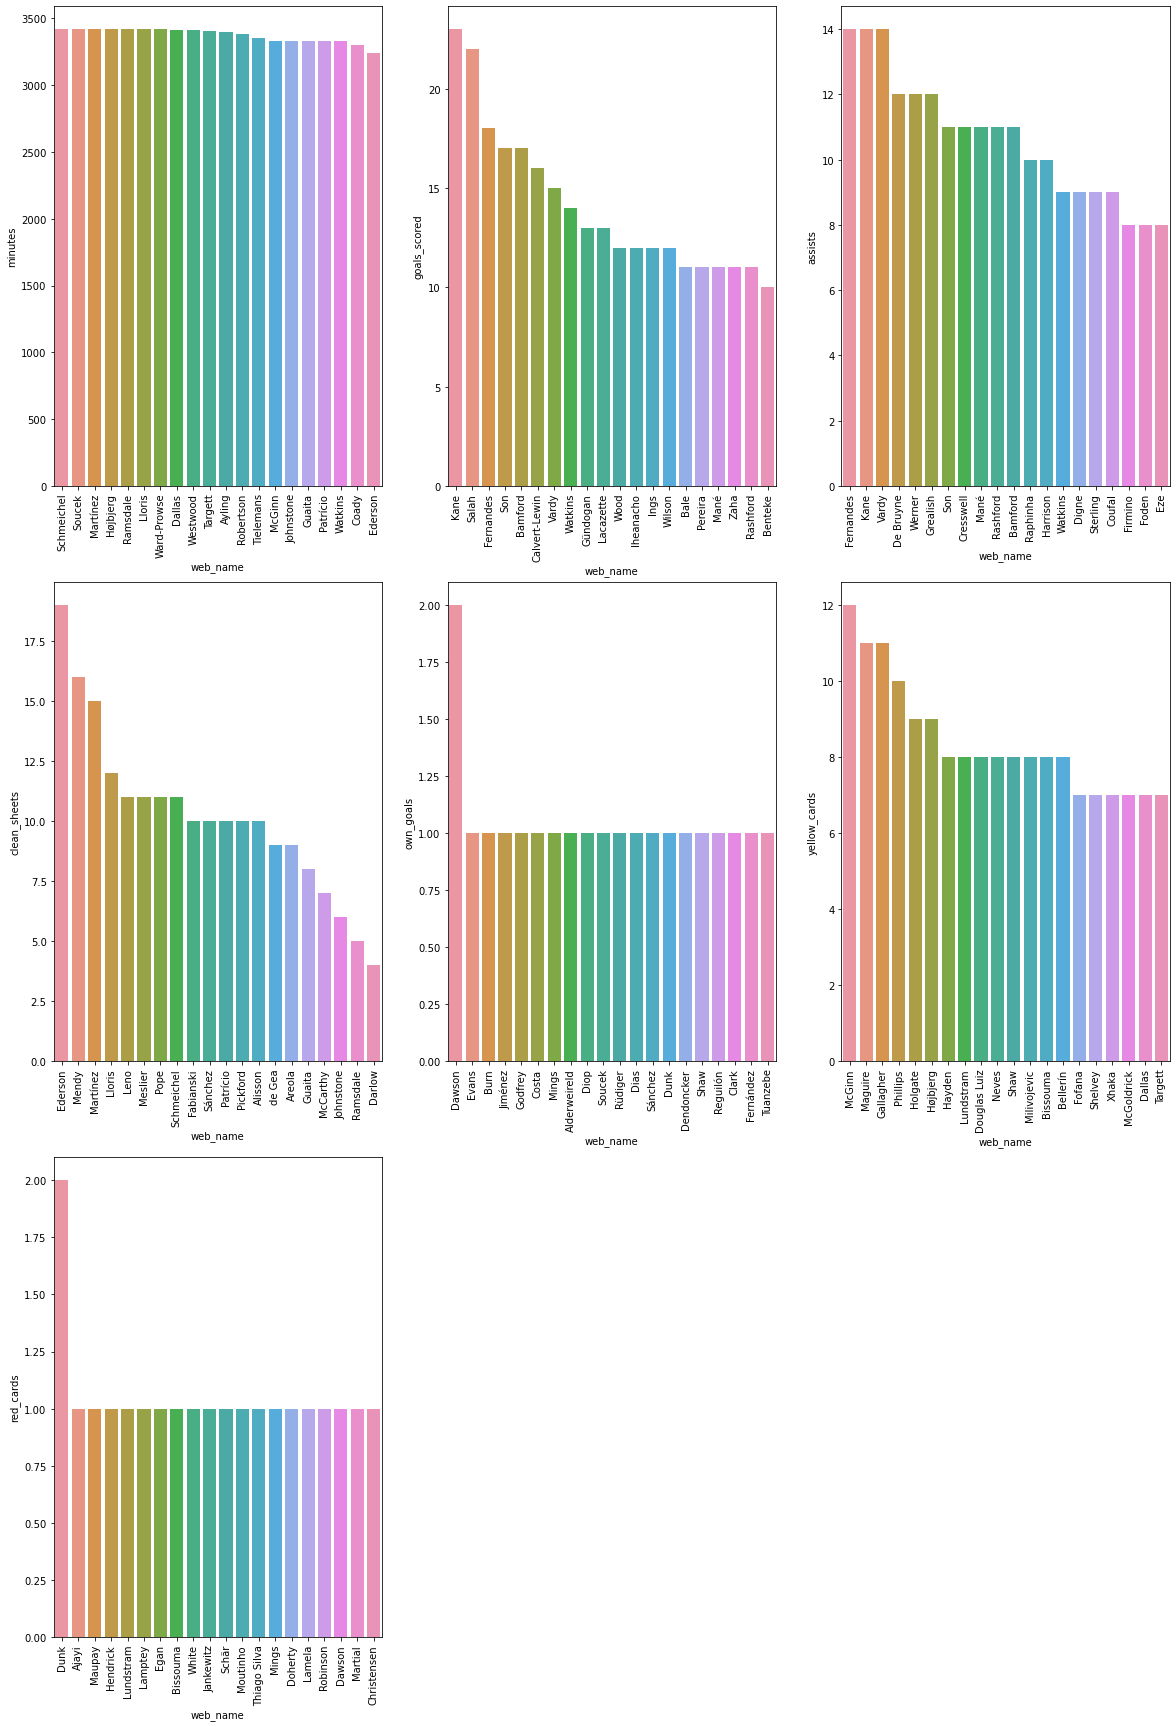

In [34]:
#plotting all top individaul stats this season

columns = ['minutes','goals_scored','assists','clean_sheets','own_goals','yellow_cards','red_cards']
fig = plt.figure(figsize=(20,30))

for i in range(len(columns)):
    plt.subplot(3,3,i+1)
    if columns[i]=='clean_sheets':
        top = season_stats_modified[season_stats_modified['element_type']=='GK']
        top = top.sort_values(columns[i],ascending=False)
        top = top[['web_name',columns[i]]][:20]
        plt.xticks(rotation=90)
        sns.barplot(x=top['web_name'],y=top[columns[i]])
    else:
        top = season_stats_modified.sort_values(columns[i],ascending=False)
        top = top[['web_name',columns[i]]][:20]
        plt.xticks(rotation=90)
        sns.barplot(x=top['web_name'],y=top[columns[i]])

In [35]:
#goal to minutes ratio

season_stats_modified_ratio = season_stats_modified[season_stats_modified['minutes'] > 200]
season_stats_modified_ratio = season_stats_modified_ratio[season_stats_modified_ratio['goals_scored'] > 5]
season_stats_modified_ratio['min_per_goals_ratio'] = season_stats_modified_ratio['minutes']/season_stats_modified_ratio['goals_scored']

In [36]:
top = season_stats_modified_ratio.sort_values('min_per_goals_ratio',ascending=True)[:20]
top[['web_name','goals_scored','minutes','min_per_goals_ratio']]

,web_name,goals_scored,minutes,min_per_goals_ratio
595,Bale,11,912,82.909091
294,Iheanacho,12,1452,121.000000
373,Jota,9,1106,122.888889
572,Kane,23,3083,134.043478
452,Cavani,10,1364,136.400000
363,Salah,22,3077,139.863636
5,Lacazette,13,1916,147.384615
461,Willock,8,1210,151.250000
391,Gündogan,13,2025,155.769231
640,Lingard,9,1423,158.111111


In [37]:
season_stats_modified_ratio = season_stats_modified_ratio[season_stats_modified_ratio['assists'] > 5]
season_stats_modified_ratio['min_per_assists_ratio'] = season_stats_modified_ratio['minutes']/season_stats_modified_ratio['assists']

In [38]:
top = season_stats_modified_ratio.sort_values('min_per_assists_ratio',ascending=True)[:20]
top[['web_name','assists','minutes','min_per_assists_ratio']]

,web_name,assists,minutes,min_per_assists_ratio
392,De Bruyne,12,1995,166.250000
44,Grealish,12,2183,181.916667
404,Foden,8,1607,200.875000
286,Vardy,14,2838,202.714286
154,Werner,12,2598,216.500000
572,Kane,14,3083,220.214286
432,Fernandes,14,3101,221.500000
341,Raphinha,10,2358,235.800000
395,Mahrez,8,1945,243.125000
360,Mané,11,2808,255.272727


creating a stat 'consistant scorer/assister' - ratio of number games with goals/assists scored by number of games played

In [39]:
#FILTER CONDITIONS - Only considering players with more than 200 mins game time and more than 5 goals scored
season_stats_modified_ratio = season_stats_modified[season_stats_modified['minutes'] > 200]
season_stats_modified_ratio = season_stats_modified_ratio[season_stats_modified_ratio['goals_scored'] > 5]

#merging filtered season_stat dataframe with weekly dataframe to get filtered weeekly stats dataframe
weekly_stats_modified_ratio_merged = pd.merge(weekly_stats_modified,season_stats_modified_ratio[['id','team']],left_on='player_id',right_on='id')
weekly_stats_modified_ratio_merged.drop(['id'],axis=1,inplace=True)

#loop to calculate number of games played and games with goals scored from filtered weekly stats dataframe
games_played=[]
games_with_goals=[]
for i in list(weekly_stats_modified_ratio_merged['player_id'].unique()):
    top = weekly_stats_modified_ratio_merged[weekly_stats_modified_ratio_merged['player_id']==i]
    games=0
    goals=0
    for j in list(top['round'].unique()):
        gameweek = top[top['round']==j].reset_index()
        if gameweek['minutes'][0] > 0:
            games=games+1
        if gameweek['goals_scored'][0] > 0:
            goals=goals+1
    games_played.append(games)
    games_with_goals.append(goals)

In [40]:
#creating new columns in existing season stats dataframe
season_stats_modified_ratio['games_played']=games_played
season_stats_modified_ratio['games_with_goals']=games_with_goals
season_stats_modified_ratio['games_with_goals/games_played'] = season_stats_modified_ratio['games_with_goals']/season_stats_modified_ratio['games_played']
season_goals_game_ratio = season_stats_modified_ratio[['web_name','games_played','games_with_goals','games_with_goals/games_played']].sort_values('games_with_goals/games_played',ascending=False)
season_goals_game_ratio = season_goals_game_ratio.reset_index()
season_goals_game_ratio.drop(['index'],axis=1,inplace=True)
season_goals_game_ratio

,web_name,games_played,games_with_goals,games_with_goals/games_played
0,Kane,34,18,0.529412
1,Salah,34,16,0.470588
2,Fernandes,33,15,0.454545
3,Lingard,16,7,0.437500
4,Calvert-Lewin,31,13,0.419355
5,Jota,17,7,0.411765
6,Willock,21,8,0.380952
7,Bamford,37,14,0.378378
8,Barnes,24,9,0.375000
9,Lacazette,30,11,0.366667


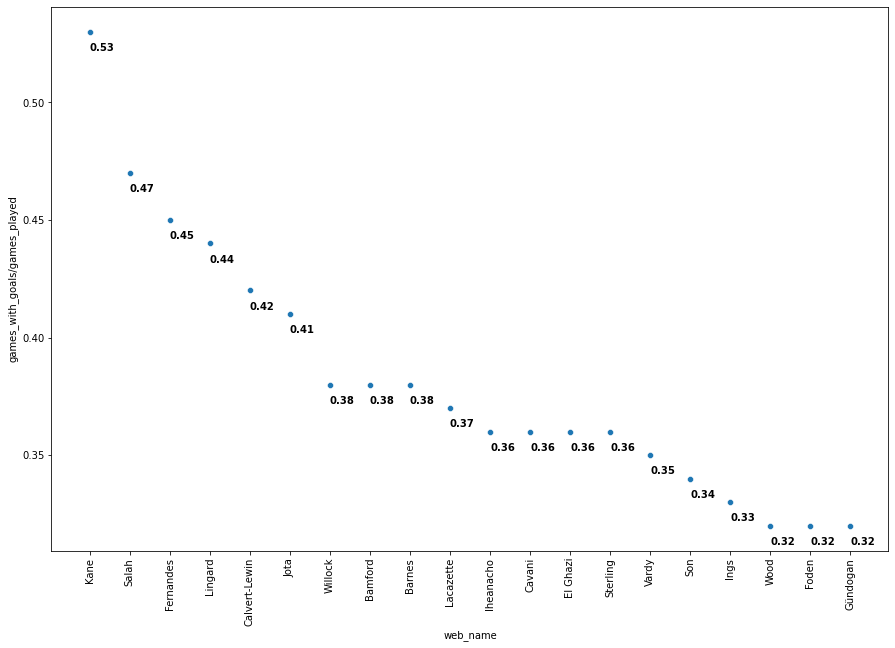

In [41]:
season_goals_game_ratio['games_with_goals/games_played'] = season_goals_game_ratio['games_with_goals/games_played'].round(decimals=2)
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.scatterplot(x=season_goals_game_ratio['web_name'][:20],y=season_goals_game_ratio['games_with_goals/games_played'][:20])

for line in range(0,20):
     plt.text(season_goals_game_ratio['web_name'][line], season_goals_game_ratio['games_with_goals/games_played'][line]-0.008, season_goals_game_ratio['games_with_goals/games_played'][line], horizontalalignment='left', size='medium', color='black', weight='semibold')


In [42]:
#games with asssits / Number of games played

season_stats_modified_ratio = season_stats_modified[season_stats_modified['minutes'] > 200]
season_stats_modified_ratio = season_stats_modified_ratio[season_stats_modified_ratio['assists'] > 5]

weekly_stats_modified_ratio_merged = pd.merge(weekly_stats_modified,season_stats_modified_ratio[['id','team']],left_on='player_id',right_on='id')
weekly_stats_modified_ratio_merged.drop(['id'],axis=1,inplace=True)

games_played=[]
games_with_assists=[]
for i in list(weekly_stats_modified_ratio_merged['player_id'].unique()):
    top = weekly_stats_modified_ratio_merged[weekly_stats_modified_ratio_merged['player_id']==i]
    games=0
    assists=0
    for j in list(top['round'].unique()):
        gameweek = top[top['round']==j].reset_index()
        if gameweek['minutes'][0] > 0:
            games=games+1
        if gameweek['assists'][0] > 0:
            assists=assists+1
    games_played.append(games)
    games_with_assists.append(assists)

In [43]:
season_stats_modified_ratio['games_played']=games_played
season_stats_modified_ratio['games_with_assists']=games_with_assists
season_stats_modified_ratio['games_with_assists/games_played'] = season_stats_modified_ratio['games_with_assists']/season_stats_modified_ratio['games_played']
season_assists_game_ratio = season_stats_modified_ratio[['web_name','games_played','games_with_assists','games_with_assists/games_played']].sort_values('games_with_assists/games_played',ascending=False)
season_assists_game_ratio = season_assists_game_ratio.reset_index()
season_assists_game_ratio.drop(['index'],axis=1,inplace=True)
season_assists_game_ratio

,web_name,games_played,games_with_assists,games_with_assists/games_played
0,De Bruyne,21,11,0.523810
1,Fernandes,33,12,0.363636
2,Werner,33,11,0.333333
3,Vardy,31,10,0.322581
4,Sterling,28,9,0.321429
5,Raphinha,29,9,0.310345
6,Rashford,33,10,0.303030
7,Kane,34,10,0.294118
8,Grealish,24,7,0.291667
9,Son,35,10,0.285714


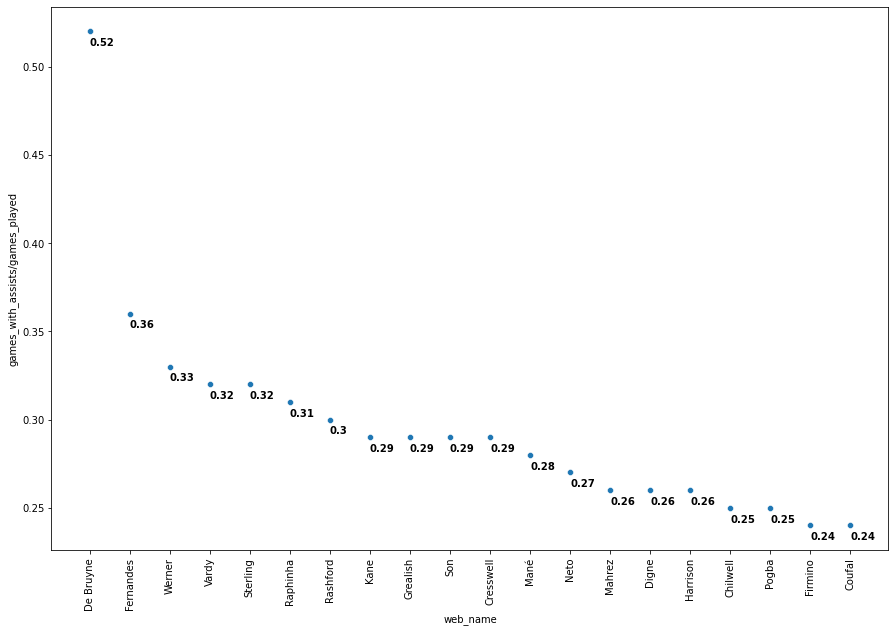

In [44]:
season_assists_game_ratio['games_with_assists/games_played'] = season_assists_game_ratio['games_with_assists/games_played'].round(decimals=2)
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.scatterplot(x=season_assists_game_ratio['web_name'][:20],y=season_assists_game_ratio['games_with_assists/games_played'][:20])

for line in range(0,20):
     plt.text(season_assists_game_ratio['web_name'][line], season_assists_game_ratio['games_with_assists/games_played'][line]-0.008, season_assists_game_ratio['games_with_assists/games_played'][line], horizontalalignment='left', size='medium', color='black', weight='semibold')


In [45]:
#Top scorer of each team

player_name = []
team_name = []
goals_scored = []

team_name
for i in team_names_loop:
    season_stats_modified_team = season_stats_modified[season_stats_modified['team']==i]
    team_name.append(i)
    season_stats_modified_team = season_stats_modified_team.sort_values('goals_scored',ascending=False)
    season_stats_modified_team = season_stats_modified_team[:1]
    player_name.append(season_stats_modified_team['web_name'].iloc[0])
    goals_scored.append(season_stats_modified_team['goals_scored'].iloc[0])

top_scorers_per_club = pd.DataFrame(player_name,columns=['Name'])
top_scorers_per_club['team_name'] = team_name
top_scorers_per_club['goals_scored'] = goals_scored

In [46]:
top_scorers_per_club

,Name,team_name,goals_scored
0,Lacazette,Arsenal,13
1,Watkins,Aston Villa,14
2,Maupay,Brighton,8
3,Wood,Burnley,12
4,Jorginho,Chelsea,7
5,Zaha,Crystal Palace,11
6,Calvert-Lewin,Everton,16
7,Decordova-Reid,Fulham,5
8,Bamford,Leicester,17
9,Vardy,Leeds,15
